In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('Keap_OHE.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [134]:
df.head()

,Category,Category_Referrals,Category_Organic,Category_Paid,Category_Partners,Category_Inbound-Direct,Country,Demo_Conducted,Channel,Channel_Biz-Dev,Channel_Direct_Sales,Channel_Partner-Sales,Channel_Value-Added,Won,Industry Bp,Score,Score_A,Score_B,Score_C,Score_S
0,Inbound-Direct,0,0,0,0,1,NaN,1,Direct-Sales,0,1,0,0,0,Retailers (physical store or eCommerce),NaN,0,0,0,0
1,NaN,0,0,0,0,0,United States,0,Partner-Sales,0,0,1,0,1,NaN,NaN,0,0,0,0
2,NaN,0,0,0,0,0,NaN,0,Direct-Sales,0,1,0,0,1,NaN,NaN,0,0,0,0
3,Organic,0,1,0,0,0,NaN,1,Partner-Sales,0,0,1,0,1,Healthcare and Devices,A,1,0,0,0
4,NaN,0,0,0,0,0,United Kingdom,0,Partner-Sales,0,0,1,0,1,NaN,NaN,0,0,0,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133676 entries, 0 to 133675
Data columns (total 20 columns):
Category                   98176 non-null object
Category_Referrals         133676 non-null int64
Category_Organic           133676 non-null int64
Category_Paid              133676 non-null int64
Category_Partners          133676 non-null int64
Category_Inbound-Direct    133676 non-null int64
Country                    81359 non-null object
Demo_Conducted             133676 non-null int64
Channel                    6421 non-null object
Channel_Biz-Dev            133676 non-null int64
Channel_Direct_Sales       133676 non-null int64
Channel_Partner-Sales      133676 non-null int64
Channel_Value-Added        133676 non-null int64
Won                        133676 non-null int64
Industry Bp                43758 non-null object
Score                      66738 non-null object
Score_A                    133676 non-null int64
Score_B                    133676 non-null int64
Score_C 

In [143]:
df.isnull().sum().sort_values(ascending=False).head(27)

Industry Bp_Travel, Hospitality and Tourism    0
Country_Honduras                               0
Country_Guinea                                 0
Country_Guatemala                              0
Country_Guadeloupe                             0
Country_Grenada                                0
Country_Greenland                              0
Country_Greece                                 0
Country_Ghana                                  0
Country_Germany                                0
Country_Georgia                                0
Country_Gambia                                 0
Country_Gabon                                  0
Country_French Guiana                          0
Country_France                                 0
Country_Finland                                0
Country_Fiji                                   0
Country_Ethiopia                               0
Country_Estonia                                0
Country_England                                0
Country_El Salvador 

In [137]:
df = pd.get_dummies(data=df, columns=['Country', 'Industry Bp'])

In [140]:
df = df.drop(['Channel', 'Score', 'Category'], axis=1)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133676 entries, 0 to 133675
Columns: 228 entries, Category_Referrals to Industry Bp_Travel, Hospitality and Tourism
dtypes: int64(15), uint8(213)
memory usage: 42.5 MB


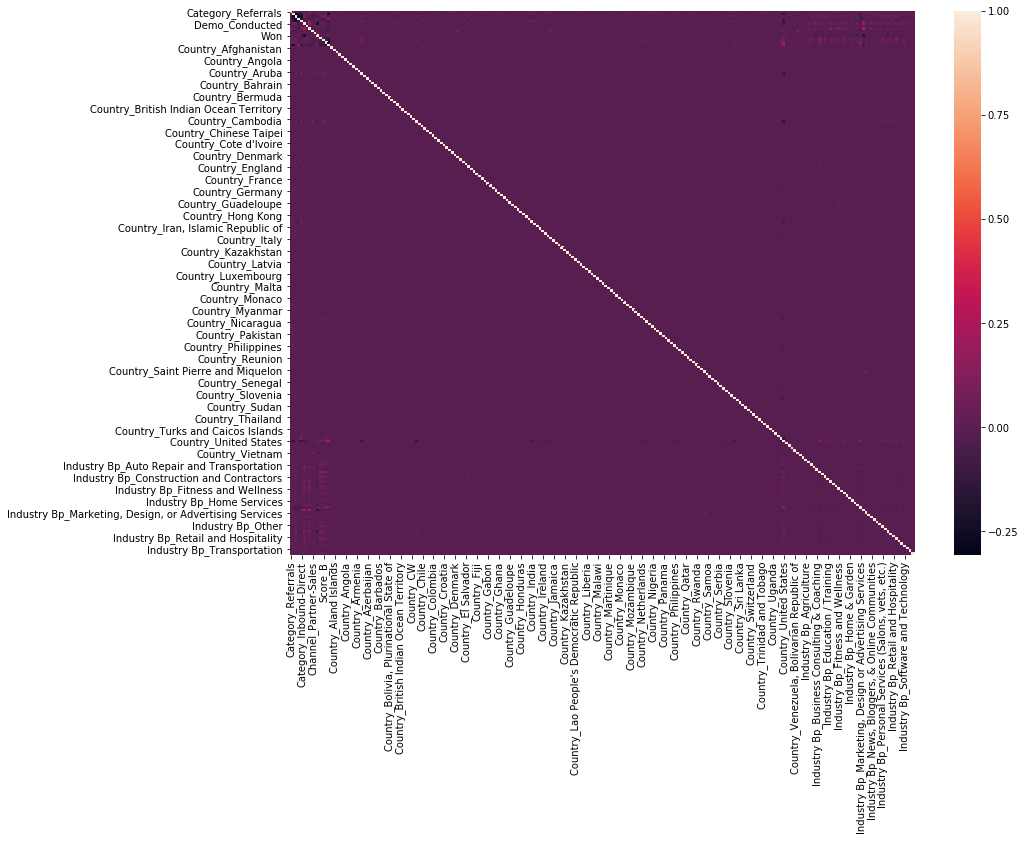

In [147]:
fig, ax = plt.subplots(figsize = (14,10)) #figsize horizontal, vertical
sns.heatmap(df.corr())

In [149]:
from sklearn import ensemble, linear_model, preprocessing, cross_validation, tree, svm
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
X = df.drop('Won', axis=1)
y = df['Won']

In [151]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.2)

clf = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=1)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9769225014961102

In [152]:
cross_val_score(clf, X_test, y_test, cv=10)

array([0.97757009, 0.97681376, 0.97606582, 0.97419596, 0.97681376,
       0.97643098, 0.97643098, 0.97605686, 0.97568275, 0.97643098])

## Customer Funnel

In [23]:
import plotly
plotly.tools.set_credentials_file(username='mikess314', api_key='t0V62FODDyamcvwVRXwt')
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import graph_objs as go

In [85]:
phases = ['Lead', 'Prospect', 'Opportunity', 'Won']
values = [133676, 76053, 20361, 6478]

In [12]:
# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

In [13]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [14]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

In [24]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mikess314/0 or inside your plot.ly account where it is named 'plot from API'
